In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import datetime as dt
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.formula.api as sm
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

#Import statsmodels package for training a linear regression model.
from patsy import dmatrices
import statsmodels.formula.api as sm
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import accuracy_score

/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:

df = pd.read_csv('01gps.csv')
df.head()

/Users/chenzeng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,DateTime,LineID,Direction,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,0,2013-01-01 00:00:03,747.0,0,07470001,2012-12-31,3493,SL,0,-6.236852,53.425327,-709,747006,40040,7411,0
1,1,2013-01-01 00:00:05,27.0,0,null,2012-12-31,3883,RD,0,-6.233417,53.342232,0,27017,33521,395,0
2,2,2013-01-01 00:00:07,40.0,0,null,2012-12-31,2226,HN,0,-6.278250,53.416683,0,40206,33142,6071,0
3,3,2013-01-01 00:00:07,7.0,0,00071003,2012-12-31,6106,D1,0,-6.231633,53.317768,0,7019,43004,3222,1
4,4,2013-01-01 00:00:11,747.0,0,07471001,2012-12-31,3531,SL,0,-6.254617,53.355484,-454,747007,40039,1445,0


In [5]:
#delete the constant columns
#drop the constant numberic columns
num_columns = df.select_dtypes(['int64','float64']).columns
num_columns
for column in num_columns:
    if len(df[column].unique()) == 1:
        df.drop([column], 1, inplace=True)
df.head()

,Unnamed: 0,DateTime,LineID,JourneyPatternID,TimeFrame,VehicleJourneyID,Opertator,Congestion,LonWGS84,LatWGS84,Delay,BlockID,VehicleID,StopID,AtStop
0,0,2013-01-01 00:00:03,747.0,07470001,2012-12-31,3493,SL,0,-6.236852,53.425327,-709,747006,40040,7411,0
1,1,2013-01-01 00:00:05,27.0,null,2012-12-31,3883,RD,0,-6.233417,53.342232,0,27017,33521,395,0
2,2,2013-01-01 00:00:07,40.0,null,2012-12-31,2226,HN,0,-6.278250,53.416683,0,40206,33142,6071,0
3,3,2013-01-01 00:00:07,7.0,00071003,2012-12-31,6106,D1,0,-6.231633,53.317768,0,7019,43004,3222,1
4,4,2013-01-01 00:00:11,747.0,07471001,2012-12-31,3531,SL,0,-6.254617,53.355484,-454,747007,40039,1445,0


In [6]:
df.drop(['Unnamed: 0','Opertator', 'TimeFrame','LonWGS84','LatWGS84','Delay','Congestion','BlockID'],axis=1).to_csv('one.csv',index=None)

df = pd.read_csv('one.csv')
df.head()

,DateTime,LineID,JourneyPatternID,VehicleJourneyID,VehicleID,StopID,AtStop
0,2013-01-01 00:00:03,747.0,07470001,3493,40040,7411,0
1,2013-01-01 00:00:05,27.0,null,3883,33521,395,0
2,2013-01-01 00:00:07,40.0,null,2226,33142,6071,0
3,2013-01-01 00:00:07,7.0,00071003,6106,43004,3222,1
4,2013-01-01 00:00:11,747.0,07471001,3531,40039,1445,0


In [7]:
df.shape

(44455133, 7)

In [8]:
#delete the journeypatternID&stopID is equal to null value

import csv

inpu = open('one.csv', 'r')
output = open('new.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[2]!="null" and row[2]!="" :
        writer.writerow(row)
inpu.close()
output.close()

In [9]:
#delete the time between 1:00 and 5:00 for route 41
df = pd.read_csv('new.csv')
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%Y-%m-%d %H:%M:%S")
time = df['DateTime']
ne =[]
for i in time:
    h=i.hour
    ne.append(h)
t = pd.DataFrame({'time': ne})

df_dt = pd.concat([t.time,df],axis=1)
df_dt.to_csv('neww3.csv',index=None)

/Users/chenzeng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#delete the time between 1:00 and 5:00 for route 41
import csv

inpu = open('neww3.csv', 'r')
output = open('clean.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[0] !="0" and  row[0] !="1" and row[0] !="2" and row[0] !="3" and row[0] !="4" and row[0] !="5":
        writer.writerow(row)
inpu.close()
output.close()

In [11]:
df = pd.read_csv('clean.csv')
df.head()

/Users/chenzeng/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,time,DateTime,LineID,JourneyPatternID,VehicleJourneyID,VehicleID,StopID,AtStop
0,6,2013-01-01 06:36:58,41.0,00410001,13159,33629,1171,0
1,6,2013-01-01 06:37:20,41.0,00410001,13159,33629,1171,0
2,6,2013-01-01 06:37:50,41.0,00410001,13159,33629,1172,0
3,6,2013-01-01 06:38:20,41.0,00410001,13159,33629,1172,0
4,6,2013-01-01 06:38:50,41.0,00410001,13159,33629,1173,0


In [12]:
#select only atstop is equeal to 1
import csv
inpu = open('clean.csv', 'r')
output = open('newclean.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[7]!="0":
        writer.writerow(row)
inpu.close()
output.close()

In [13]:
df = pd.read_csv('newclean.csv')
df.describe()

,time,LineID,VehicleJourneyID,VehicleID,StopID,AtStop
count,1.021226e+07,1.021226e+07,1.021226e+07,1.021226e+07,1.021226e+07,10212263.0
mean,1.419271e+01,8.671200e+01,7.609964e+03,3.559551e+04,3.029870e+03,1.0
std,4.710112e+00,1.448692e+02,4.259805e+04,3.347435e+03,2.337629e+03,0.0
min,6.000000e+00,1.000000e+00,1.000000e+00,2.804700e+04,2.000000e+00,1.0
25%,1.000000e+01,1.600000e+01,3.147000e+03,3.332400e+04,8.070000e+02,1.0
50%,1.400000e+01,4.000000e+01,4.970000e+03,3.353800e+04,2.492000e+03,1.0
75%,1.800000e+01,8.300000e+01,6.840000e+03,3.803900e+04,4.713000e+03,1.0
max,2.300000e+01,7.470000e+02,9.998360e+05,4.307800e+04,7.552000e+03,1.0


In [14]:
object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

time                   int64
DateTime            category
LineID               float64
JourneyPatternID    category
VehicleJourneyID       int64
VehicleID              int64
StopID                 int64
AtStop                 int64
dtype: object

In [15]:
df.select_dtypes(['category']).describe().T 

,count,unique,top,freq
DateTime,10212263,726267,2013-01-28 13:11:51,222
JourneyPatternID,10212263,464,046A0001,264955


## using the cleaning data by anogus

In [2]:
df = pd.read_csv('fullmonthdata_with_weather.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
time = df['timestamp']
ne =[]
for i in time:
    h=i.hour
    ne.append(h)
t = pd.DataFrame({'time': ne})

df_dt = pd.concat([t.time,df],axis=1)
df_dt.to_csv('newm.csv',index=None)

In [3]:
# convert stop.txt into csv file and match lontitude and latitude
import csv

inpu = open('newm.csv', 'r')
output = open('clean.csv', 'w')
writer = csv.writer(output)
for row in csv.reader(inpu):
    if row[0] !="0" and  row[0] !="1" and row[0] !="2" and row[0] !="3" and row[0] !="4" and row[0] !="5":
        writer.writerow(row)
inpu.close()
output.close()


In [4]:
df = pd.read_csv('clean.csv')
df.head()

,time,Unnamed: 0,timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,temp,hum,pres,rain
0,6,387,2013-01-01 06:45:01,41.0,00410001,13159,0,121,15,1,1.973,90.2,998.84,0.0
1,6,388,2013-01-01 06:50:41,41.0,00410001,13159,0,94,220,1,1.973,90.2,998.84,0.0
2,6,389,2013-01-01 06:51:42,41.0,00410001,13159,0,128,1622,1,1.973,90.2,998.84,0.0
3,6,390,2013-01-01 06:54:43,747.0,07471001,14897,0,0,3665,1,1.973,90.2,998.84,0.0
4,6,391,2013-01-01 06:55:01,747.0,07471001,14897,0,0,3665,1,1.932,90.1,998.89,0.0


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df['new_date'] = [d.date() for d in df['timestamp']]
df['new_time'] = [d.time() for d in df['timestamp']]

df['date'] = pd.to_datetime(df['new_date'])
df['day'] = df['date'].dt.weekday

df.head()

,time,Unnamed: 0,timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,temp,hum,pres,rain,new_date,new_time,date,day
0,6,387,2013-01-01 06:45:01,41.0,00410001,13159,0,121,15,1,1.973,90.2,998.84,0.0,2013-01-01,06:45:01,2013-01-01,1
1,6,388,2013-01-01 06:50:41,41.0,00410001,13159,0,94,220,1,1.973,90.2,998.84,0.0,2013-01-01,06:50:41,2013-01-01,1
2,6,389,2013-01-01 06:51:42,41.0,00410001,13159,0,128,1622,1,1.973,90.2,998.84,0.0,2013-01-01,06:51:42,2013-01-01,1
3,6,390,2013-01-01 06:54:43,747.0,07471001,14897,0,0,3665,1,1.973,90.2,998.84,0.0,2013-01-01,06:54:43,2013-01-01,1
4,6,391,2013-01-01 06:55:01,747.0,07471001,14897,0,0,3665,1,1.932,90.1,998.89,0.0,2013-01-01,06:55:01,2013-01-01,1


In [6]:
df.dtypes

time                         int64
Unnamed: 0                   int64
timestamp           datetime64[ns]
LineID                     float64
JourneyPatternID            object
VehicleJourneyID             int64
Congestion                   int64
Delay                        int64
StopID                       int64
AtStop                       int64
temp                       float64
hum                        float64
pres                       float64
rain                       float64
new_date                    object
new_time                    object
date                datetime64[ns]
day                          int64
dtype: object

In [7]:
#converting time into seconds
dd = df['new_time']
seconds = []
for i in dd:
    rr = (3600 * i.hour + 60 * i.minute + i.second)
    seconds.append(rr)


In [8]:
tt = pd.DataFrame({'seconds': seconds})
df_con = pd.concat([df,tt],axis=1)
df_con

,time,Unnamed: 0,timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,temp,hum,pres,rain,new_date,new_time,date,day,seconds
0,6,387,2013-01-01 06:45:01,41.0,00410001,13159,0,121,15,1,1.973,90.2,998.84,0.0,2013-01-01,06:45:01,2013-01-01,1,24301
1,6,388,2013-01-01 06:50:41,41.0,00410001,13159,0,94,220,1,1.973,90.2,998.84,0.0,2013-01-01,06:50:41,2013-01-01,1,24641
2,6,389,2013-01-01 06:51:42,41.0,00410001,13159,0,128,1622,1,1.973,90.2,998.84,0.0,2013-01-01,06:51:42,2013-01-01,1,24702
3,6,390,2013-01-01 06:54:43,747.0,07471001,14897,0,0,3665,1,1.973,90.2,998.84,0.0,2013-01-01,06:54:43,2013-01-01,1,24883
4,6,391,2013-01-01 06:55:01,747.0,07471001,14897,0,0,3665,1,1.932,90.1,998.89,0.0,2013-01-01,06:55:01,2013-01-01,1,24901
5,6,392,2013-01-01 06:55:21,747.0,07471001,14897,0,0,3665,1,1.932,90.1,998.89,0.0,2013-01-01,06:55:21,2013-01-01,1,24921
6,6,393,2013-01-01 06:55:41,747.0,07471001,14897,0,0,3665,1,1.932,90.1,998.89,0.0,2013-01-01,06:55:41,2013-01-01,1,24941
7,6,394,2013-01-01 06:56:02,747.0,07471001,14897,0,0,3665,1,1.932,90.1,998.89,0.0,2013-01-01,06:56:02,2013-01-01,1,24962
8,6,395,2013-01-01 06:56:22,747.0,07471001,14897,0,0,3665,1,1.932,90.1,998.89,0.0,2013-01-01,06:56:22,2013-01-01,1,24982
9,6,396,2013-01-01 06:56:22,41.0,00410001,13159,0,138,1627,1,1.932,90.1,998.89,0.0,2013-01-01,06:56:22,2013-01-01,1,24982


In [9]:
df_con.set_index(['VehicleJourneyID','new_date'], inplace=True)
df_con.sort_index(inplace=True)
df_con

time  Unnamed: 0           timestamp  LineID  \
VehicleJourneyID new_date                                                   
1                2013-01-02    16      464734 2013-01-02 16:21:34   331.0   
                 2013-01-02    16      467914 2013-01-02 16:28:30   331.0   
                 2013-01-02    16      468685 2013-01-02 16:29:50   331.0   
                 2013-01-02    16      471176 2013-01-02 16:35:07   331.0   
                 2013-01-02    16      474976 2013-01-02 16:42:48   331.0   
                 2013-01-02    16      475509 2013-01-02 16:43:50   331.0   
                 2013-01-02    16      476114 2013-01-02 16:45:08   331.0   
                 2013-01-02    16      479317 2013-01-02 16:51:28   331.0   
                 2013-01-02    17      485365 2013-01-02 17:02:35   331.0   
                 2013-01-02    17      489294 2013-01-02 17:09:49   331.0   
                 2013-01-02    17      489370 2013-01-02 17:09:53   331.0   
                 2013-01-03    16      901550 2013-01-03 16:19:16   331.0   
                 2013-01-03    16      903038 2013-01-03 16:22:34   331.0   
                 2013-01-03    16      903824 2013-01-03 16:24:15   331.0   
                 2013-01-03    16      905173 2013-01-03 16:26:55   331.0   
                 2013-01-03    16      906742 2013-01-03 16:29:54   331.0   
                 2013-01-03    16      907162 2013-01-03 16:30:50   331.0   
                 2013-01-03    16      911251 2013-01-03 16:39:26   331.0   
                 2013-01-03    16      913822 2013-01-03 16:44:46   331.0   
                 2013-01-03    16      914254 2013-01-03 16:45:46   331.0   
                 2013-01-03    16      914792 2013-01-03 16:47:07   331.0   
                 2013-01-03    16      916447 2013-01-03 16:50:48   331.0   
                 2013-01-03    16      920500 2013-01-03 16:58:55   331.0   
                 2013-01-03    17      923916 2013-01-03 17:05:44   331.0   
                 2013-01-03    17      923950 2013-01-03 17:05:48   331.0   
                 2013-01-03    17      924104 2013-01-03 17:06:09   331.0   
                 2013-01-03    17      924282 2013-01-03 17:06:30   331.0   
                 2013-01-03    17      924431 2013-01-03 17:06:44   331.0   
                 2013-01-03    17      924508 2013-01-03 17:06:50   331.0   
                 2013-01-03    17      924645 2013-01-03 17:07:09   331.0   
...                           ...         ...                 ...     ...   
999711           2013-01-10    11     3304492 2013-01-10 11:32:08    16.0   
                 2013-01-10    11     3306403 2013-01-10 11:37:11    16.0   
                 2013-01-10    11     3307399 2013-01-10 11:39:46    16.0   
                 2013-01-10    11     3307733 2013-01-10 11:40:45    16.0   
                 2013-01-10    11     3308114 2013-01-10 11:41:47    16.0   
                 2013-01-10    11     3308240 2013-01-10 11:42:10    16.0   
                 2013-01-10    11     3308942 2013-01-10 11:44:10    16.0   
                 2013-01-10    11     3309174 2013-01-10 11:44:49    16.0   
                 2013-01-10    11     3309358 2013-01-10 11:45:14    16.0   
                 2013-01-10    11     3309449 2013-01-10 11:45:30    16.0   
                 2013-01-10    11     3309562 2013-01-10 11:45:51    16.0   
                 2013-01-10    11     3309716 2013-01-10 11:46:13    16.0   
                 2013-01-10    11     3309815 2013-01-10 11:46:32    16.0   
                 2013-01-10    11     3310070 2013-01-10 11:47:11    16.0   
999762           2013-01-28    10     9261424 2013-01-28 10:02:04    39.0   
                 2013-01-28    10     9261571 2013-01-28 10:02:29    39.0   
                 2013-01-28    10     9261663 2013-01-28 10:02:45    39.0   
                 2013-01-28    10     9261825 2013-01-28 10:03:03    39.0   
                 2013-01-28    10     9262431 2013-01-28 10:04:45    39.0   
                 2013-01-

In [10]:
df_con['diff'] = df_con['seconds'].diff()
df_con

time  Unnamed: 0           timestamp  LineID  \
VehicleJourneyID new_date                                                   
1                2013-01-02    16      464734 2013-01-02 16:21:34   331.0   
                 2013-01-02    16      467914 2013-01-02 16:28:30   331.0   
                 2013-01-02    16      468685 2013-01-02 16:29:50   331.0   
                 2013-01-02    16      471176 2013-01-02 16:35:07   331.0   
                 2013-01-02    16      474976 2013-01-02 16:42:48   331.0   
                 2013-01-02    16      475509 2013-01-02 16:43:50   331.0   
                 2013-01-02    16      476114 2013-01-02 16:45:08   331.0   
                 2013-01-02    16      479317 2013-01-02 16:51:28   331.0   
                 2013-01-02    17      485365 2013-01-02 17:02:35   331.0   
                 2013-01-02    17      489294 2013-01-02 17:09:49   331.0   
                 2013-01-02    17      489370 2013-01-02 17:09:53   331.0   
                 2013-01-03    16      901550 2013-01-03 16:19:16   331.0   
                 2013-01-03    16      903038 2013-01-03 16:22:34   331.0   
                 2013-01-03    16      903824 2013-01-03 16:24:15   331.0   
                 2013-01-03    16      905173 2013-01-03 16:26:55   331.0   
                 2013-01-03    16      906742 2013-01-03 16:29:54   331.0   
                 2013-01-03    16      907162 2013-01-03 16:30:50   331.0   
                 2013-01-03    16      911251 2013-01-03 16:39:26   331.0   
                 2013-01-03    16      913822 2013-01-03 16:44:46   331.0   
                 2013-01-03    16      914254 2013-01-03 16:45:46   331.0   
                 2013-01-03    16      914792 2013-01-03 16:47:07   331.0   
                 2013-01-03    16      916447 2013-01-03 16:50:48   331.0   
                 2013-01-03    16      920500 2013-01-03 16:58:55   331.0   
                 2013-01-03    17      923916 2013-01-03 17:05:44   331.0   
                 2013-01-03    17      923950 2013-01-03 17:05:48   331.0   
                 2013-01-03    17      924104 2013-01-03 17:06:09   331.0   
                 2013-01-03    17      924282 2013-01-03 17:06:30   331.0   
                 2013-01-03    17      924431 2013-01-03 17:06:44   331.0   
                 2013-01-03    17      924508 2013-01-03 17:06:50   331.0   
                 2013-01-03    17      924645 2013-01-03 17:07:09   331.0   
...                           ...         ...                 ...     ...   
999711           2013-01-10    11     3304492 2013-01-10 11:32:08    16.0   
                 2013-01-10    11     3306403 2013-01-10 11:37:11    16.0   
                 2013-01-10    11     3307399 2013-01-10 11:39:46    16.0   
                 2013-01-10    11     3307733 2013-01-10 11:40:45    16.0   
                 2013-01-10    11     3308114 2013-01-10 11:41:47    16.0   
                 2013-01-10    11     3308240 2013-01-10 11:42:10    16.0   
                 2013-01-10    11     3308942 2013-01-10 11:44:10    16.0   
                 2013-01-10    11     3309174 2013-01-10 11:44:49    16.0   
                 2013-01-10    11     3309358 2013-01-10 11:45:14    16.0   
                 2013-01-10    11     3309449 2013-01-10 11:45:30    16.0   
                 2013-01-10    11     3309562 2013-01-10 11:45:51    16.0   
                 2013-01-10    11     3309716 2013-01-10 11:46:13    16.0   
                 2013-01-10    11     3309815 2013-01-10 11:46:32    16.0   
                 2013-01-10    11     3310070 2013-01-10 11:47:11    16.0   
999762           2013-01-28    10     9261424 2013-01-28 10:02:04    39.0   
                 2013-01-28    10     9261571 2013-01-28 10:02:29    39.0   
                 2013-01-28    10     9261663 2013-01-28 10:02:45    39.0   
                 2013-01-28    10     9261825 2013-01-28 10:03:03    39.0   
                 2013-01-28    10     9262431 2013-01-28 10:04:45    39.0   
                 2013-01-

In [11]:
import numpy as np
df_con = df_con.replace(np.nan, '0', regex=True)
df_con.head()

time  Unnamed: 0           timestamp  LineID  \
VehicleJourneyID new_date                                                   
1                2013-01-02    16      464734 2013-01-02 16:21:34   331.0   
                 2013-01-02    16      467914 2013-01-02 16:28:30   331.0   
                 2013-01-02    16      468685 2013-01-02 16:29:50   331.0   
                 2013-01-02    16      471176 2013-01-02 16:35:07   331.0   
                 2013-01-02    16      474976 2013-01-02 16:42:48   331.0   

                            JourneyPatternID  Congestion  Delay  StopID  \
VehicleJourneyID new_date                                                 
1                2013-01-02         033A1002           0    149    3819   
                 2013-01-02         033A1002           0    329    3832   
                 2013-01-02         033A1002           0    378    3833   
                 2013-01-02         033A1002           0    594    3840   
                 2013-01-02         033A1002           0    667    3853   

                             AtStop   temp   hum    pres  rain  new_time  \
VehicleJourneyID new_date                                                  
1                2013-01-02       1  11.88  87.9  1016.4   0.0  16:21:34   
                 2013-01-02       1  11.81  87.9  1016.3   0.0  16:28:30   
                 2013-01-02       1  11.81  87.9  1016.3   0.0  16:29:50   
                 2013-01-02       1  11.79  88.0  1016.3   0.0  16:35:07   
                 2013-01-02       1  11.79  88.0  1016.3   0.0  16:42:48   

                                  date  day  seconds diff  
VehicleJourneyID new_date                                  
1                2013-01-02 2013-01-02    2    58894    0  
                 2013-01-02 2013-01-02    2    59310  416  
                 2013-01-02 2013-01-02    2    59390   80  
                 2013-01-02 2013-01-02    2    59707  317  
                 2013-01-02 2013-01-02    2    60168  461

In [12]:
df_con.drop(['Unnamed: 0','JourneyPatternID','new_time','seconds','Delay','Congestion','AtStop','day'],axis=1).to_csv('cleanmonth.csv',index=None)


In [2]:
df = pd.read_csv('cleanmonth.csv')
df.head()

,time,timestamp,LineID,StopID,temp,hum,pres,rain,date,diff
0,16,2013-01-02 16:21:34,331.0,3819,11.88,87.9,1016.4,0.0,2013-01-02 00:00:00,0.0
1,16,2013-01-02 16:28:30,331.0,3832,11.81,87.9,1016.3,0.0,2013-01-02 00:00:00,416.0
2,16,2013-01-02 16:29:50,331.0,3833,11.81,87.9,1016.3,0.0,2013-01-02 00:00:00,80.0
3,16,2013-01-02 16:35:07,331.0,3840,11.79,88.0,1016.3,0.0,2013-01-02 00:00:00,317.0
4,16,2013-01-02 16:42:48,331.0,3853,11.79,88.0,1016.3,0.0,2013-01-02 00:00:00,461.0


In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format="%Y-%m-%d %H:%M:%S")
df['date'] = [d.date() for d in df['timestamp']]
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.weekday

df

,time,timestamp,LineID,StopID,temp,hum,pres,rain,date,diff,day
0,16,2013-01-02 16:21:34,331.0,3819,11.880,87.9,1016.40,0.0,2013-01-02,0.0,2
1,16,2013-01-02 16:28:30,331.0,3832,11.810,87.9,1016.30,0.0,2013-01-02,416.0,2
2,16,2013-01-02 16:29:50,331.0,3833,11.810,87.9,1016.30,0.0,2013-01-02,80.0,2
3,16,2013-01-02 16:35:07,331.0,3840,11.790,88.0,1016.30,0.0,2013-01-02,317.0,2
4,16,2013-01-02 16:42:48,331.0,3853,11.790,88.0,1016.30,0.0,2013-01-02,461.0,2
5,16,2013-01-02 16:43:50,331.0,3854,11.790,88.0,1016.30,0.0,2013-01-02,62.0,2
6,16,2013-01-02 16:45:08,331.0,3855,11.740,88.3,1016.50,0.0,2013-01-02,78.0,2
7,16,2013-01-02 16:51:28,331.0,3863,11.740,88.3,1016.50,0.0,2013-01-02,380.0,2
8,17,2013-01-02 17:02:35,331.0,3689,11.780,88.3,1016.60,0.0,2013-01-02,667.0,2
9,17,2013-01-02 17:09:49,331.0,3692,11.800,88.1,1016.70,0.0,2013-01-02,434.0,2


In [4]:
#clean the diff greater than 1800s and less than 60s
df.loc[(df['diff'] >= 60.0) & (df['diff'] <= 1800.0)].to_csv('newone.csv',index=None)

df = pd.read_csv('newone.csv')
df

,time,timestamp,LineID,StopID,temp,hum,pres,rain,date,diff,day
0,16,2013-01-02 16:28:30,331.0,3832,11.810,87.9,1016.30,0.0,2013-01-02 00:00:00,416.0,2
1,16,2013-01-02 16:29:50,331.0,3833,11.810,87.9,1016.30,0.0,2013-01-02 00:00:00,80.0,2
2,16,2013-01-02 16:35:07,331.0,3840,11.790,88.0,1016.30,0.0,2013-01-02 00:00:00,317.0,2
3,16,2013-01-02 16:42:48,331.0,3853,11.790,88.0,1016.30,0.0,2013-01-02 00:00:00,461.0,2
4,16,2013-01-02 16:43:50,331.0,3854,11.790,88.0,1016.30,0.0,2013-01-02 00:00:00,62.0,2
5,16,2013-01-02 16:45:08,331.0,3855,11.740,88.3,1016.50,0.0,2013-01-02 00:00:00,78.0,2
6,16,2013-01-02 16:51:28,331.0,3863,11.740,88.3,1016.50,0.0,2013-01-02 00:00:00,380.0,2
7,17,2013-01-02 17:02:35,331.0,3689,11.780,88.3,1016.60,0.0,2013-01-02 00:00:00,667.0,2
8,17,2013-01-02 17:09:49,331.0,3692,11.800,88.1,1016.70,0.0,2013-01-02 00:00:00,434.0,2
9,16,2013-01-03 16:22:34,331.0,3818,11.240,87.0,1025.80,0.0,2013-01-03 00:00:00,198.0,3


In [5]:
#df_1 = [df.LineID,df.StopID,df.time,df.day, df.temp,df.hum,df.pres,df.rain,df.diff]
df[df[['LineID','StopID','time','day','temp','hum','pres','diff']].columns].to_csv('cleangmonthgps.csv',index=None)

#df_1.to_csv('cleangps.csv',index=None)


In [3]:
df_new = pd.read_csv('cleangmonthgps.csv')
df_new.head()
df_new.shape

(2782260, 8)

In [19]:
df_new[['diff','StopID','time','LineID']].corr()

,diff,StopID,time,LineID
diff,1.000000,0.136122,0.042953,0.110429
StopID,0.136122,1.000000,0.004212,0.159150
time,0.042953,0.004212,1.000000,-0.006185
LineID,0.110429,0.159150,-0.006185,1.000000


# Random Forest

In [4]:
#Select the train set data
#X = pd.concat([df_cont_feat, df_dummies_broadband[['EnergyRating_B', 'EnergyRating_C']]], axis =1)

X=df_new[['LineID','time','StopID','day','temp','hum','pres']]
y=df_new[['diff']]
# Instantiate estimator, fit with training set
# Train a classification tree
rfc = RandomForestRegressor( max_features='auto', oob_score=True, random_state=1)
rfc.fit(X, y)
print(rfc)

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)


In [5]:
# Compute the importance of each feature based on the trained decision tree classifier
pd.DataFrame({'feature': X.columns, 'importance': rfc.feature_importances_})

,feature,importance
0,LineID,0.074570
1,time,0.093169
2,StopID,0.254326
3,day,0.042407
4,temp,0.196013
5,hum,0.170946
6,pres,0.168569


According to the above table, it can be seen that the most important feature is StopID. the three least important features are AtStop, Congestion and JourneyID.

In [6]:
rfc.predict(X)

array([ 328.5       ,  172.8       ,  292.2       , ...,  247.        ,
        117.4       ,  217.18333333])

In [7]:
df_predict=pd.DataFrame({'time': df_new['time'],'Actual':df_new['diff'], 'Predict':rfc.predict(X)})
df_predict

,Actual,Predict,time
0,416.0,328.500000,16
1,80.0,172.800000,16
2,317.0,292.200000,16
3,461.0,436.200000,16
4,62.0,157.100000,16
5,78.0,78.000000,16
6,380.0,283.400000,16
7,667.0,665.900000,17
8,434.0,542.100000,17
9,198.0,207.900000,16


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

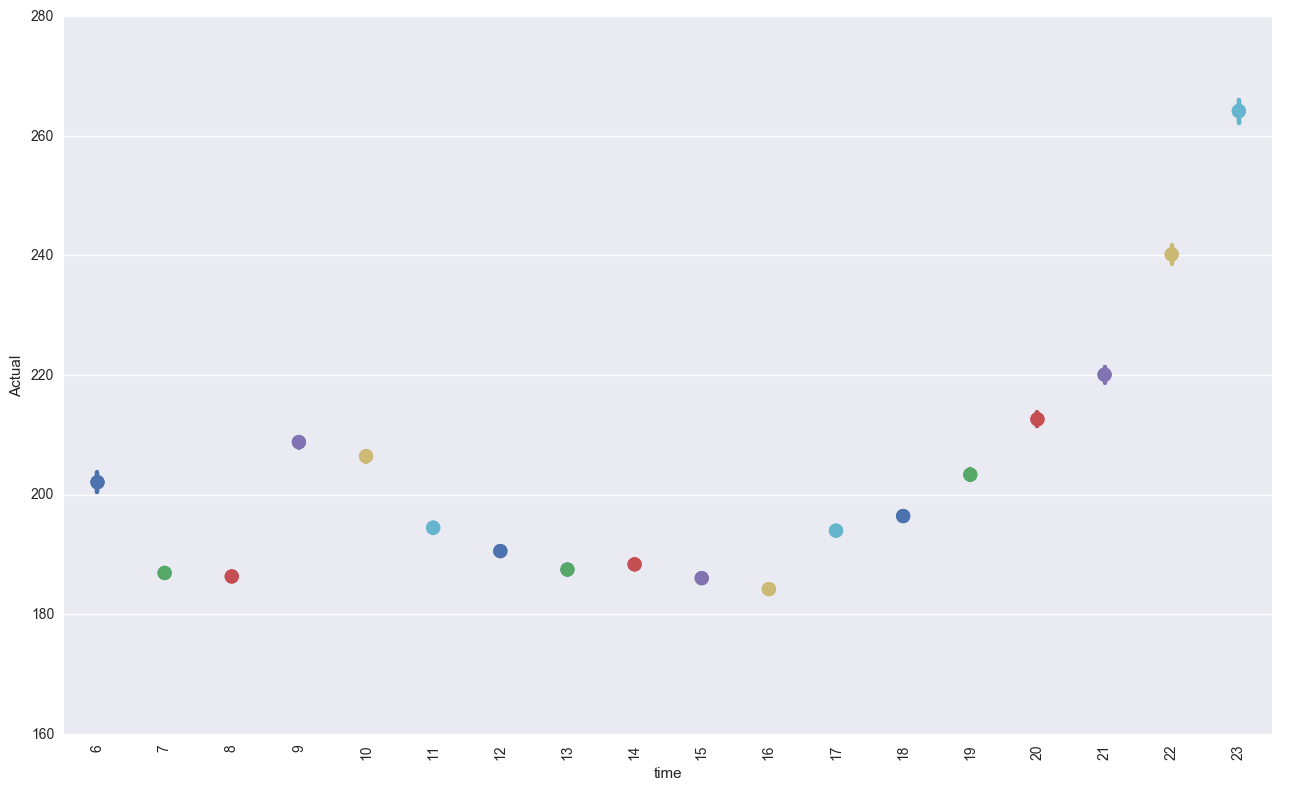

In [10]:
#plot diagram
grid = sns.FacetGrid(df_predict, size=8, aspect=1.6)
grid.map(sns.pointplot, 'time', 'Actual', palette='deep')
grid.add_legend()
pl.xticks(rotation = 90)
grid.map(sns.pointplot, 'time', 'Actual', palette='deep')
grid.add_legend()
pl.xticks(rotation = 90)

In [ ]:
grid = sns.FacetGrid(df_predict, size=8, aspect=1.6)

grid.map(sns.pointplot, 'time', 'Predict', palette='deep')
grid.add_legend()
pl.xticks(rotation = 90)

In [11]:
import numpy as np
rmse = np.sqrt(((df_new['diff'] - rfc.predict(X))** 2).mean())
print("\nRoot Mean Squared Error:\n", rmse)


Root Mean Squared Error:
 77.3062899478


In [12]:
# Print the Mean Squared Error of the model on the training set
mse = ((df_new['diff'] - rfc.predict(X))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 5976.26246549111


In [13]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(df_new['diff'] - rfc.predict(X)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 44.00374428366091


#  Evaluate on hold-out data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
rfc.fit(X_train, y_train)
print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/chenzeng/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Training data:
          LineID  time  StopID  day    temp     hum     pres   diff
534949     40.0    16      49    4  10.570   79.00  1027.40   79.0
2709846    40.0    18     186    1   4.874   85.20  1010.00  600.0
2651632     9.0    22    2441    6   2.998   84.80   990.35  640.0
102571    102.0    18    3619    4   2.554   89.00   984.81  201.0
2283241    17.0    16    1304    5   5.631   75.30  1008.10  519.0
159846     25.0    22    4607    1   2.498   93.50  1019.30   80.0
774361     39.0    10    6112    0   6.070   88.00   989.03   61.0
2776954    14.0    10     746    1  -1.128  100.00   995.03  101.0
1551055    14.0    18    1046    4   7.880   89.70   988.38  140.0
2670243    11.0    20    3030    6   2.739   89.70   988.90   61.0
2459964    14.0     8     297    5  10.320   78.80  1024.30  302.0
1163998    44.0    19    2827    4   4.610   91.90  1004.90   60.0
2630027    39.0    12    1713    6   5.868   73.80   982.97   81.0
2577771    67.0    20    3906    6   2.862   8

In [16]:
predictions_test = rfc.predict(X_test)
df_true_vs_predicted_test = pd.DataFrame({'Actual': y_test['diff'], 'Predicted': predictions_test})

df_true_vs_predicted_test

,Actual,Predicted
7201,80.0,144.200000
800799,107.0,86.700000
1621300,100.0,110.600000
737993,92.0,142.600000
1931794,761.0,618.500000
2577809,159.0,259.600000
2011935,180.0,140.066667
4009,374.0,331.450000
225167,79.0,128.200000
2352799,1248.0,451.400000


In [17]:
# Print the Mean Squared Error of the model on the training set
mse = ((y_test['diff'] - rfc.predict(X_test))** 2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 28364.667518159316


In [18]:
# Print the Mean Absolute Error of the model on the training set
mae = abs(y_test['diff'] - rfc.predict(X_test)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 105.42548830091062


In [19]:
# Print the Mean Squared Error of the model on the training set
RMSE= np.sqrt(((y_test['diff'] - rfc.predict(X_test))** 2).mean())
print("\nRoot Mean Squared Error:\n",RMSE)


Root Mean Squared Error:
 168.418132985


# Linear Regression

In [20]:

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
Y_pred = linear_regression.predict(X_test)
#lm = sm.ols(formula="diff ~  JourneyPatternID + time + Congestion + AtStop + StopID + BlockID", data=df_new).fit()
MSE_linear = ((linear_regression.predict(X_test) - y_test) ** 2).mean()
print("Mean squared error: %.2f" %  MSE_linear)

Mean squared error: 29723.65


In [21]:
MAE_linear= abs((linear_regression.predict(X_test) - y_test)).mean()
print("Mean absolute error: %.2f" % MAE_linear)

Mean absolute error: 112.68


In [22]:
RMSE_linear = np.sqrt(((linear_regression.predict(X_test) - y_test) ** 2).mean())
print("\nRoot Mean squared error: %.2f" % RMSE_linear)


Root Mean squared error: 172.41


# evalutation model

In [ ]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

In [ ]:
#random forest
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, Y_pred) * 100, 2)
acc_random_forest

In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
Y_pred = linear_regression.predict(X_test)
linear_regression.score(X_train, y_train)
acc_linear_regression = round(linear_regression.score(X_train, y_train) * 100, 2)
acc_linear_regression

In [38]:
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/chenzeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


ValueError: Can't handle mix of multiclass and continuous

In [ ]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
Y_pred = linear_regression.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy_linear * 100.0))